In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib

# %matplotlib inline

Моя задача состоит в классификации пульсаров. Пульсар — космический источник радио- (радиопульсар), оптического (оптический пульсар), рентгеновского (рентгеновский пульсар) и/или гамма- (гамма-пульсар) излучений, приходящих на Землю в виде периодических всплесков (импульсов). Согласно доминирующей астрофизической модели, пульсары представляют собой вращающиеся нейтронные звёзды с магнитным полем, которое наклонено к оси вращения, что вызывает модуляцию приходящего на Землю излучения.

Attribute Information:

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

    Mean of the integrated profile.
    Standard deviation of the integrated profile.
    Excess kurtosis of the integrated profile.
    Skewness of the integrated profile.
    Mean of the DM-SNR curve.
    Standard deviation of the DM-SNR curve.
    Excess kurtosis of the DM-SNR curve.
    Skewness of the DM-SNR curve.
    Class


In [2]:
data = pd.read_csv('pulsar_stars.csv', sep = ',')

In [3]:
data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


# Статистические характеристики данных

In [5]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [6]:
data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

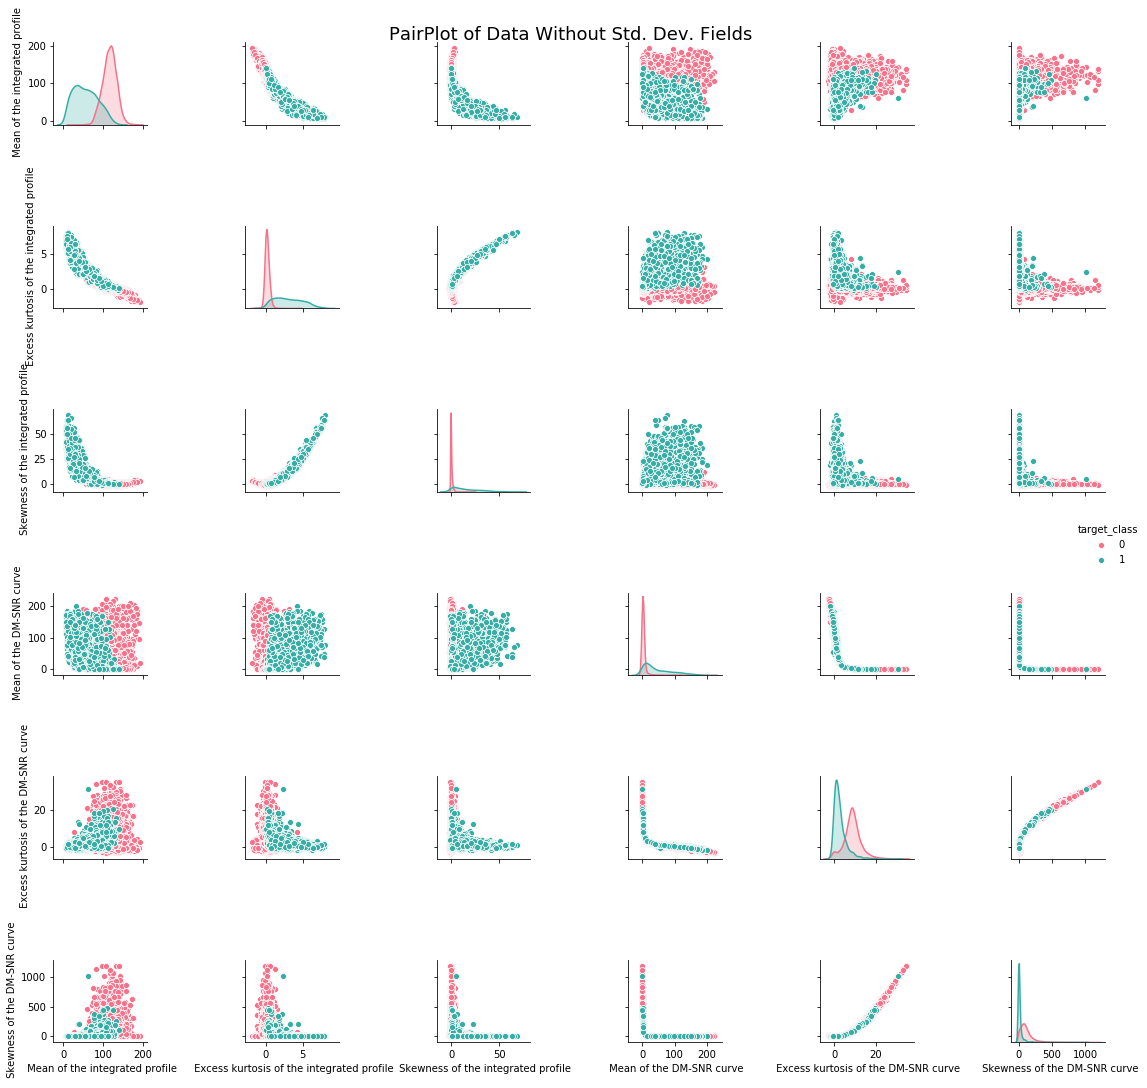

In [7]:
sn.pairplot(data=data,
            palette="husl",
            hue="target_class",
            vars=[" Mean of the integrated profile",
                  " Excess kurtosis of the integrated profile",
                  " Skewness of the integrated profile",
                  " Mean of the DM-SNR curve",
                  " Excess kurtosis of the DM-SNR curve",
                  " Skewness of the DM-SNR curve"])

plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show()

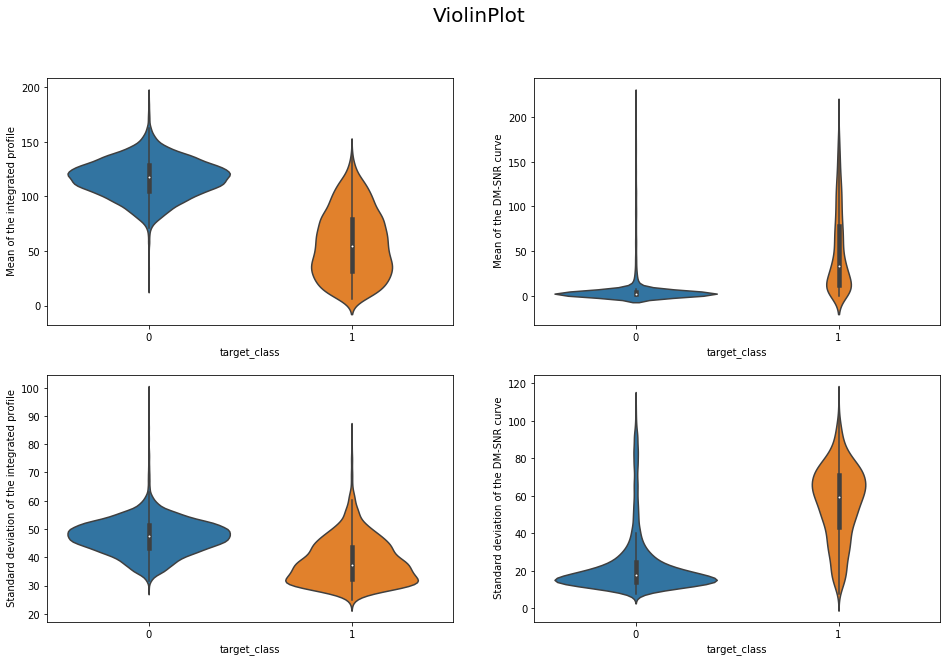

In [8]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sn.violinplot(data=data,y=" Mean of the integrated profile",x="target_class")

plt.subplot(2,2,2)
sn.violinplot(data=data,y=" Mean of the DM-SNR curve",x="target_class")

plt.subplot(2,2,3)
sn.violinplot(data=data,y=" Standard deviation of the integrated profile",x="target_class")

plt.subplot(2,2,4)
sn.violinplot(data=data,y=" Standard deviation of the DM-SNR curve",x="target_class")


plt.suptitle("ViolinPlot",fontsize=20)

plt.show()

# Гистограммы распределений признаков

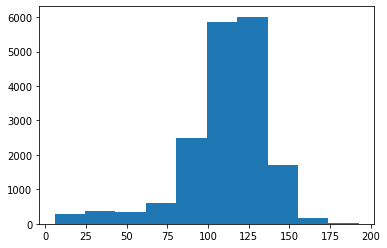

In [9]:
plt.hist(data[data.columns[0]])
pass

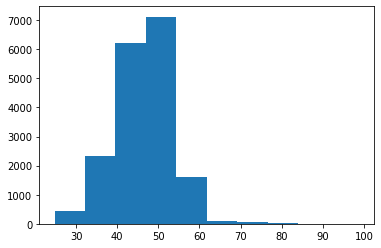

In [10]:
plt.hist(data[data.columns[1]])
pass

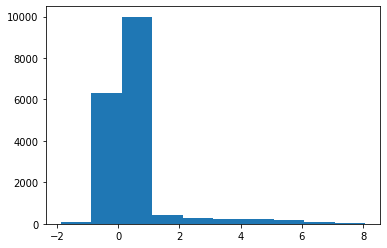

In [11]:
plt.hist(data[data.columns[2]])
pass

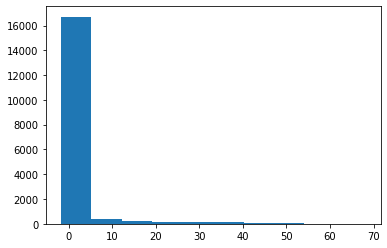

In [12]:
plt.hist(data[data.columns[3]])
pass

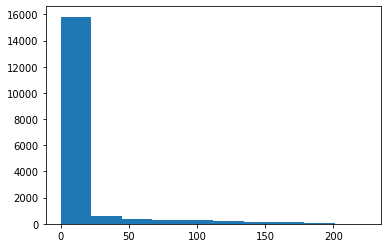

In [13]:
plt.hist(data[data.columns[4]])
pass

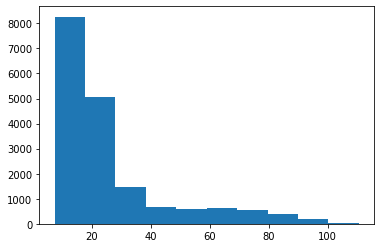

In [14]:
plt.hist(data[data.columns[5]])
pass

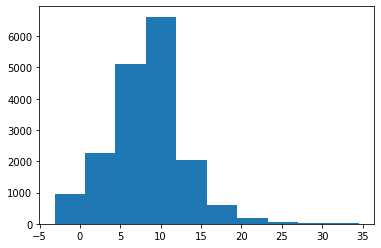

In [15]:
plt.hist(data[data.columns[6]])
pass

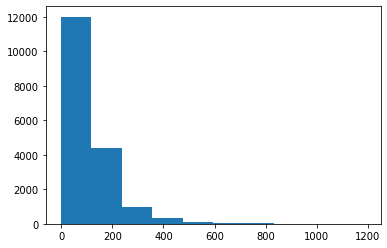

In [16]:
plt.hist(data[data.columns[7]])
pass

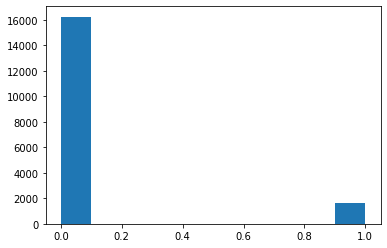

In [17]:
plt.hist(data[data.columns[8]])
pass

# Корреляционная матрица

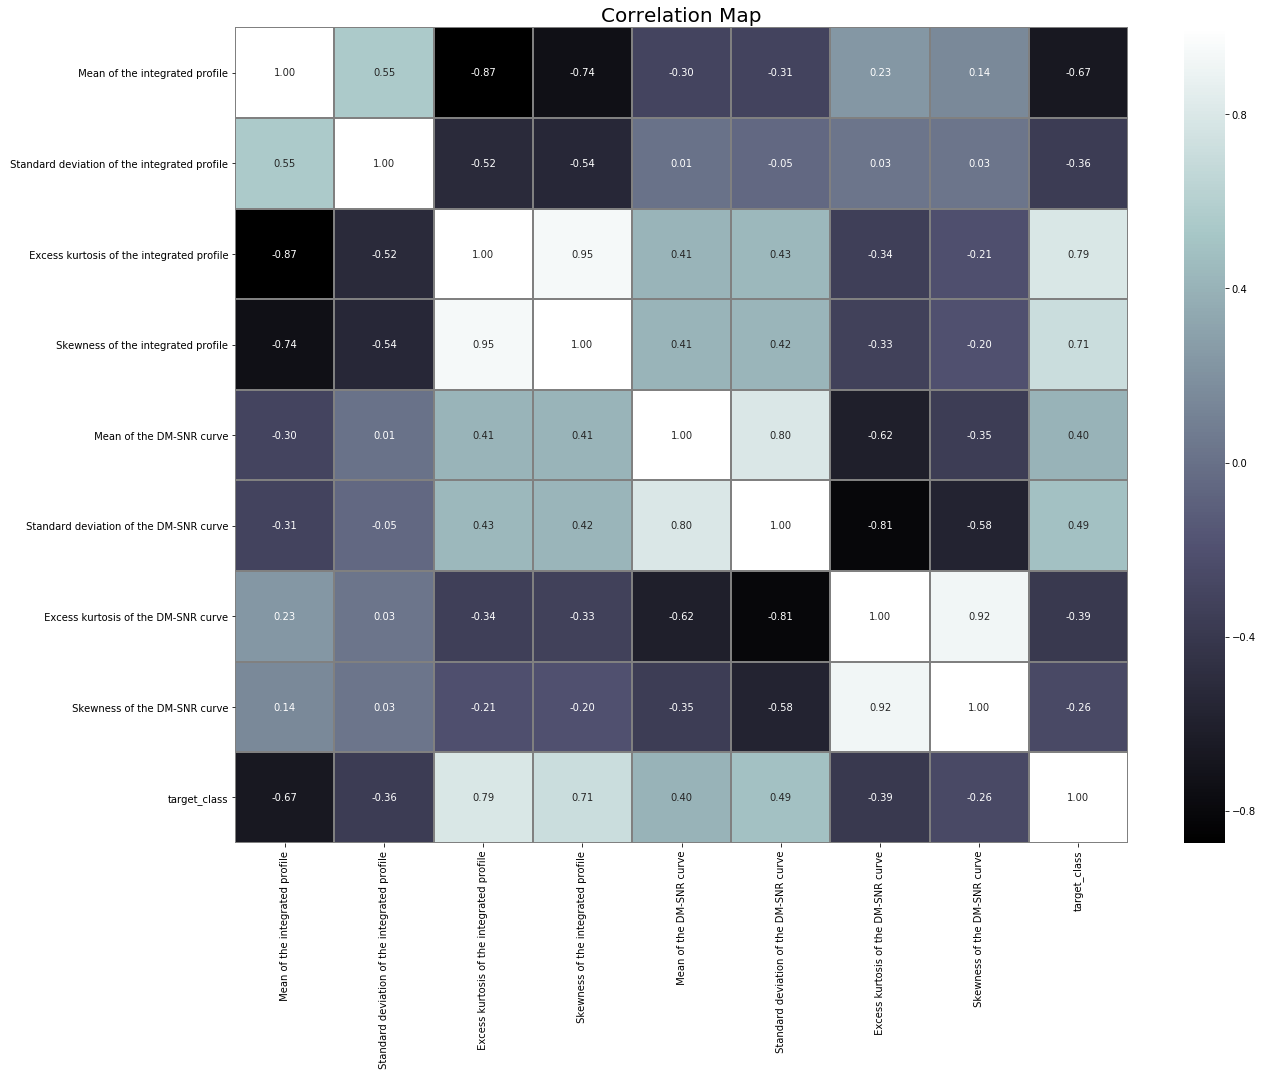

In [18]:
plt.figure(figsize=(20,15))
sn.heatmap(data=data.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
plt.title("Correlation Map",fontsize=20)
plt.show()

# Препроцессинг

In [19]:
X = data.drop(['target_class'], axis = 1)

In [20]:
y = data['target_class']

In [21]:
X = sk.preprocessing.scale(X)

In [22]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7
count,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04
mean,5.935084e-17,-3.368508e-16,2.218213e-16,-3.557391e-16,-1.192972e-16,6.056664e-17,4.345613e-16,3.182602e-16
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-4.103640e+00,-3.182449e+00,-2.212262e+00,-5.775478e-01,-4.207776e-01,-9.736032e-01,-2.539483e+00,-1.003034e+00
25%,-3.956882e-01,-6.098955e-01,-4.236418e-01,-3.175961e-01,-3.627611e-01,-6.106403e-01,-5.597136e-01,-6.562405e-01
50%,1.558601e-01,5.815398e-02,-2.392997e-01,-2.548046e-01,-3.329443e-01,-4.039644e-01,2.884145e-02,-2.046083e-01
75%,6.239604e-01,6.537588e-01,-4.259430e-03,-1.365972e-01,-2.426074e-01,1.079397e-01,5.324947e-01,3.234543e-01
max,3.178564e+00,7.632529e+00,7.134956e+00,1.075456e+01,7.151778e+00,4.330538e+00,5.822567e+00,1.019742e+01


# Разбиение на тест и трейн

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3 соседа

In [24]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


### Результат на тесте

In [25]:
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.91      0.86      0.89       321

    accuracy                           0.98      3580
   macro avg       0.95      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580

[[3233   26]
 [  44  277]]


In [27]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(expected,model.predict_proba(X_test)[:,1]))

0.9538168446066917


### Результат на трейне

In [28]:
expected = y_train
predicted = model.predict(X_train)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13000
           1       0.95      0.87      0.91      1318

    accuracy                           0.98     14318
   macro avg       0.97      0.93      0.95     14318
weighted avg       0.98      0.98      0.98     14318

[[12939    61]
 [  174  1144]]


In [29]:
print(roc_auc_score(expected,model.predict_proba(X_train)[:,1]))

0.9977825084627058


## 5 соседей

In [30]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


### Результат на тесте

In [31]:
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.93      0.85      0.89       321

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580

[[3237   22]
 [  48  273]]


In [32]:
print(roc_auc_score(expected,model.predict_proba(X_test)[:,1]))

0.9640759975490828


### Результат на трейне

In [33]:
expected = y_train
predicted = model.predict(X_train)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13000
           1       0.94      0.85      0.89      1318

    accuracy                           0.98     14318
   macro avg       0.96      0.92      0.94     14318
weighted avg       0.98      0.98      0.98     14318

[[12933    67]
 [  198  1120]]


In [34]:
print(roc_auc_score(expected,model.predict_proba(X_train)[:,1]))

0.9964128341309677


Судя по значениям метрик, данные очень хорошие, и даже дисбаланс классов не может внести достаточную помеху для классификации. А также имеет место небольшое переобучение. Также заметно, что с повышением количества соседей с 3 до 5 ошибка на тестовой выборке упала, что в свою очередь свидетельствует о меньшем переобучении.

In [35]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print(model)
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.94      0.82      0.87       321

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580

[[3241   18]
 [  58  263]]


/home/mdurinov/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3259
           1       0.66      0.86      0.75       321

    accuracy                           0.95      3580
   macro avg       0.82      0.91      0.86      3580
weighted avg       0.96      0.95      0.95      3580

[[3116  143]
 [  45  276]]
